<a href="https://colab.research.google.com/github/shawnxinyaoz/latencynbandwidth/blob/master/Xinyao_Zhang_Latency_%26_Bandwidth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Latency & Bandwidth
Xinyao Zhang 



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Import the required system libraries here. The external libraries allowed are already imported.
import os
import random
import time

import numpy as np
np.set_printoptions(suppress=True) # Suppress scientific notation while printing numbers

import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 8) # Enlarges the graphs to 12in x 8in 

In [ ]:
FILE = 'gdrive/My Drive/ubuntu-18.04.3-desktop-amd64.iso'
size = os.path.getsize(FILE)
print(size)
range = size - 4096 # set the range of the seeker

2082816000


In [ ]:
#Q2 A

f = open(FILE, mode='rb', buffering=0, encoding=None, errors=None, newline=None, closefd=True, opener=None)

In [1]:
#Q2 B

latency_seq = {} # make it a dictionary

def seq(block_number):
  i = 0 # for while loop
  f.seek(0) # reset seeker
  latency_seq[block_number] = 0
  while i < block_number:
    # loop block_number of times
    if f.tell() < range: # let the parser stay in left range
      start = time.perf_counter()   # get start time
      f.read(4096) # read!
      end = time.perf_counter() # get end time
      each_latency = end - start # get each latency
      latency_seq[block_number] = latency_seq[block_number] + each_latency #sum the latency
      #print(latency_seq) #for debug
      i += 1
    else:
      f.seek(0) # get parser back to the start point if it is near the end of the file
  #print("Sequentially Reading " + str(block_number) + " blocks takes latency of " + str(latency_seq[block_number]) + " seconds.")
  #print(latency_seq)
  #print(seq_latency)
  return latency_seq[block_number]
  
l = [1, 4, 16, 64, 256, 1024, 4*1024, 16*1024, 64*1024,256*1024, 1024*1024]

def seql():
  s= []
  for block_number in l:
    s.append(seq(block_number))
  return s

seql()
 
seq_latency = seql()
print(seq_latency)


NameError: ignored

In [ ]:
#Q2 C

latency_ran = {}

def ran(block_number):
  i = 0
  latency_ran[block_number] = 0
  while i < block_number:
    start = time.time()
    rand_loc = random.randrange(0,range)
    f.seek(rand_loc, 0)
    f.read(4096)
    end = time.time()
    each_latency = end - start
    latency_ran[block_number] = latency_ran[block_number] + each_latency #sum the latency
    #print(latency_ran) #for debug
    i += 1
  #print("Randomly reading " + str(block_number) + " blocks takes latency of " + str(latency_ran[block_number]) + " seconds.")
  return(latency_ran[block_number])

def ranl():
  r= []
  for block_number in l:
    r.append(ran(block_number))
  return r

ranl()

ran_latency = ranl()
print(ran_latency)

[8.106231689453125e-06, 1.6689300537109375e-05, 6.4849853515625e-05, 0.00026917457580566406, 0.0010423660278320312, 0.004213094711303711, 0.01612567901611328, 0.06537628173828125, 0.25875115394592285, 1.0333983898162842, 4.081729173660278]


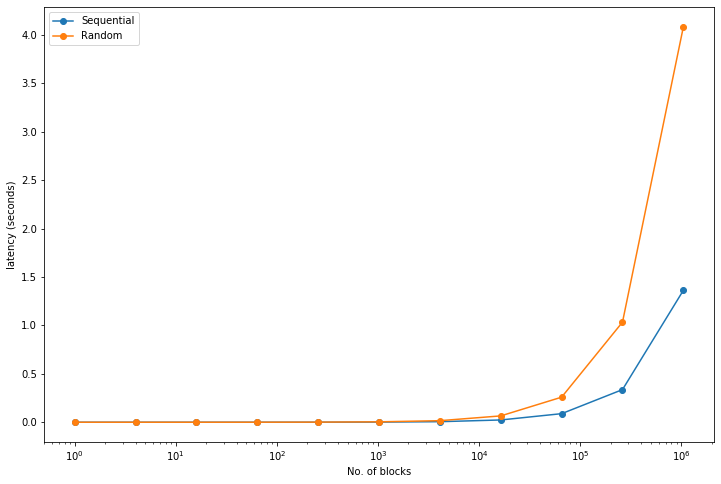

In [ ]:
#Q2 D

plt.plot(l,seq_latency,"-o",label="Sequential")
plt.plot(l,ran_latency,"-o",label="Random")
plt.xlabel("No. of blocks")
plt.ylabel("latency (seconds)")
plt.xscale("log")
plt.legend()

**Brief description:**

When the number of blocks are elow 10^4, the latencies of sequential and random reads are pretty close and close to 0. However, after 10^4, when the number of blocks gets higher, both latencies start to increase fast but the latencies of random reads increase much faster than the latencies of sequential reads. This probably indicates when the number of blocks is relatively large, random reads would provide a poorer reading performance compared to sequential reads in terms of latency.

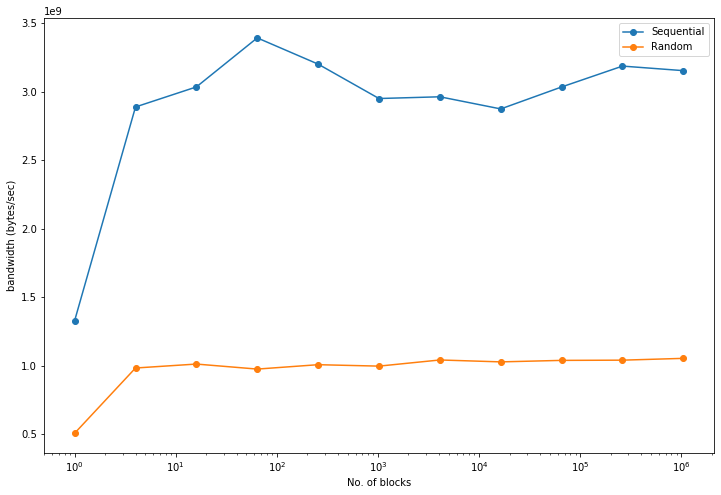

In [ ]:
#Q2 E

seq_bandwidth = []
ran_bandwidth = []
for block_number in l:
  seq_bandwidth.append(block_number * 4096 / seq_latency[l.index(block_number)])
  ran_bandwidth.append(block_number * 4096 / ran_latency[l.index(block_number)])
plt.plot(l,seq_bandwidth,"-o",label="Sequential")
plt.plot(l,ran_bandwidth,"-o",label="Random")
plt.xlabel("No. of blocks")
plt.ylabel("bandwidth (bytes/sec)")
plt.xscale("log")
plt.legend()

**Brief description:**

Random bandwith is pretty stable and lower than sequential. Sequential bandwidth increased suddenly from 1 to 4 blocks and then became generally stable.

In [ ]:
#Q3 A

i = 0
seq_latency_sim = []
ran_latency_sim = []
while i < 10:
  seql()
  seq_latency_sim.extend(seql())
  ranl()
  ran_latency_sim.extend(ranl())
  i += 1

print(seq_latency_sim)
print(ran_latency_sim)

[3.001999857588089e-06, 5.84700001127203e-06, 2.2655000066151842e-05, 7.98760001998744e-05, 0.00032144799911293376, 0.0014727239965850458, 0.005825589004416543, 0.02295368699856226, 0.08958263499221175, 0.3433441620454687, 1.4103599229242718, 3.0240000796766253e-06, 5.244000249149394e-06, 2.0074000076419907e-05, 7.453999978679349e-05, 0.0003170310014866118, 0.0014315419996364653, 0.005753289006861451, 0.0229511540258045, 0.09135151002533348, 0.35826402098086874, 1.4080536062474494, 3.1640001907362603e-06, 5.671999815604067e-06, 2.1140999933777493e-05, 7.77060004111263e-05, 0.00034483900026316405, 0.002728589000298598, 0.00842256499981886, 0.030213186992341434, 0.08929787094689345, 0.34962003895861926, 1.419242374109217, 2.840999968611868e-06, 5.8940004237229005e-06, 2.234699968539644e-05, 8.415500087721739e-05, 0.0003851680007755931, 0.0015539960004389286, 0.006239527993102456, 0.02435691598293488, 0.09120260700501603, 0.35213367291112263, 1.4226990599750025, 2.9549998998845695e-06, 5.

In [ ]:
print(len(seq_latency_sim))
print(len(ran_latency_sim))

110
110


In [ ]:
#Q3 B

l = [1, 4, 16, 64, 256, 1024, 4*1024, 16*1024, 64*1024,256*1024, 1024*1024]

i={}
S={}
SB={}
R={}
RB={}
N = np.arange(1,12).tolist()
for n in N:
  i[n] = np.arange(n-1, 100+n, 11).tolist() #the index of each results for particular number of blocks read
n = 1
while n in N:
  S[n]=[]
  SB[n]=[]
  R[n]=[]
  RB[n]=[]
  k = n - 1
  while k in i[n]:
    S[n].append(seq_latency_sim[k]) #store the latencies into lists
    SB[n].append(l[n-1]*4096/seq_latency_sim[k])
    R[n].append(ran_latency_sim[k]) 
    RB[n].append(l[n-1]*4096/ran_latency_sim[k])
    k += 11
  n+=1

In [ ]:
for n in N:
  print('Sequential Latency Test --- ' + str(n))
  print(S[n]) #this is the list of latencies from each tests for each number of blocks read sequentially
  print('Sequential Bandwidth Test ---' + str(n))
  print(SB[n]) #this is the list of bandwidth

print('\n')

for n in N: 
  print('Random Latency Test --- ' + str(n))
  print(R[n]) #this is the list of latencies from each tests for each number of blocks read randomly
  print('Random Bandwidth Test ---' + str(n))
  print(RB[n]) #this is the list of bandwidth

Sequential Latency Test --- 1
[3.001999857588089e-06, 3.0240000796766253e-06, 3.1640001907362603e-06, 2.840999968611868e-06, 2.9549998998845695e-06, 3.0300000162242213e-06, 2.9259999791975133e-06, 3.052000010939082e-06, 3.431999857639312e-06, 3.2279999686579686e-06]
Sequential Bandwidth Test ---1
[1364423782.248567, 1354497318.8089368, 1294563765.1958752, 1441745880.0611439, 1386125258.4678602, 1351815174.279819, 1399863304.5525079, 1342070768.453138, 1193473242.9789255, 1268897162.258307]
Sequential Latency Test --- 2
[5.84700001127203e-06, 5.244000249149394e-06, 5.671999815604067e-06, 5.8940004237229005e-06, 5.8700002227851655e-06, 5.407000116974814e-06, 5.258999863144709e-06, 5.6999999742402e-06, 5.431000090538873e-06, 5.916000191064086e-06]
Sequential Bandwidth Test ---2
[2802120740.27953, 3124332422.11565, 2888575552.2992916, 2779775843.594387, 2791141291.000873, 3030146041.344411, 3115421263.8071656, 2874385977.9023876, 3016755611.6491156, 2769438720.5645237]
Sequential Latency T

In [ ]:
#get mean latency

print('mean:')

aves = {}
avesb = {}
aver = {}
averb = {}
for n in N:
  aves[n] = np.mean(S[n])
  avesb[n] = np.mean(SB[n])
  aver[n] = np.mean(R[n])
  averb[n] = np.mean(RB[n])
print(aves)
print(avesb)
print(aver)
print(averb)

print('\nste:')

#get ste latency
stes = {}
stesb = {}
ster = {}
sterb = {}
for n in N:
  stes[n] = np.std([S[n]])/np.sqrt(10)
  stesb[n] = np.std(SB[n])/np.sqrt(10)
  ster[n] = np.std([R[n]])/np.sqrt(10)
  sterb[n] = np.std(RB[n])/np.sqrt(10)
print(stes)
print(stesb)
print(ster)
print(sterb)

mean:
{1: 3.0653999829155508e-06, 2: 5.624000095849624e-06, 3: 2.1322699922166066e-05, 4: 7.958040014273138e-05, 5: 0.0003532333003022359, 6: 0.0016284622977536856, 7: 0.006119274900538585, 8: 0.023956835499006957, 9: 0.08978890159123694, 10: 0.3510731712689221, 11: 1.4117449184274165}
{1: 1339747565.730508, 2: 2919209346.4557333, 3: 3079257312.8990498, 4: 3301366178.5454645, 5: 3021164916.6166587, 6: 2671173430.774408, 7: 2777225821.2815676, 8: 2820499100.483543, 9: 2990987916.4792523, 10: 3059468089.543472, 11: 3042581929.230315}
{1: 5.173683166503906e-06, 2: 1.5497207641601562e-05, 3: 6.263256072998047e-05, 4: 0.00025699138641357424, 5: 0.0010406017303466798, 6: 0.004039192199707031, 7: 0.016077399253845215, 8: 0.06431305408477783, 9: 0.25723991394042967, 10: 1.031735372543335, 11: 4.096378326416016}
{1: 898965001.1193317, 2: 1062561810.8516929, 3: 1053137965.9080307, 4: 1028626318.6944733, 5: 1012319687.619523, 6: 1041157109.0830967, 7: 1045245434.6447222, 8: 1044950332.5907055, 9:

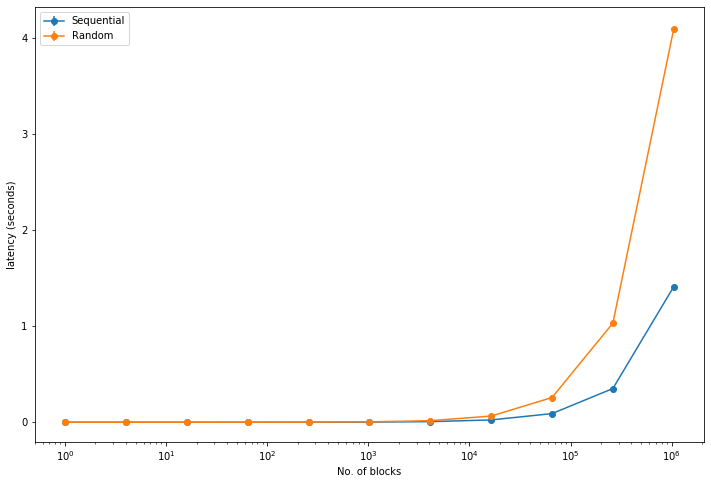

In [ ]:
#Q3 C
plt.errorbar(l,list(aves.values()),yerr=list(stes.values()),label='Sequential',fmt='-o')
plt.errorbar(l,list(aver.values()),yerr=list(ster.values()),label='Random',fmt="-o")
plt.xlabel("No. of blocks")
plt.ylabel("latency (seconds)")
plt.xscale("log")
plt.legend()

**Brief description:**

Similar to Q2. When the number of blocks are elow 10^4, the latencies of sequential and random reads are pretty close and close to 0. However, after 10^4, when the number of blocks gets higher, both start to increase fast and the latencies of random reads increase much faster than the latencies of sequential reads. 

And the standard error for each points are pretty small and hard to notice.

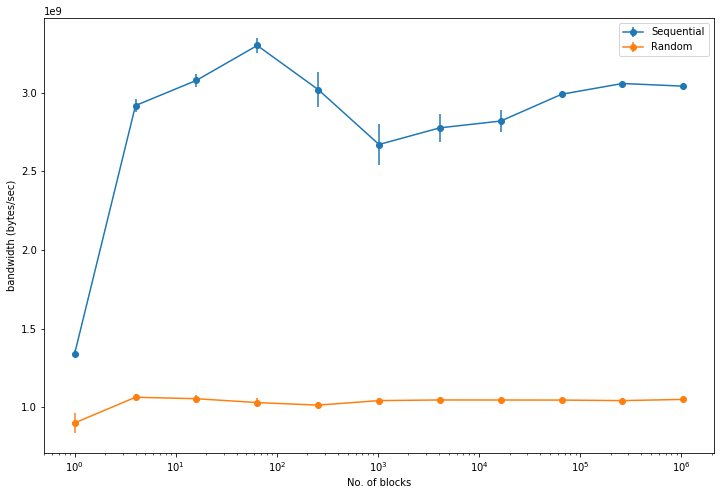

In [ ]:
plt.errorbar(l,list(avesb.values()),yerr=list(stesb.values()),label='Sequential',fmt='-o')
plt.errorbar(l,list(averb.values()),yerr=list(sterb.values()),label='Random',fmt="-o")
plt.xlabel("No. of blocks")
plt.ylabel("bandwidth (bytes/sec)")
plt.xscale("log")
plt.legend()

**Brief description:**

Similar to Q2. Random bandwith is pretty stable and lower than sequential. Sequential bandwidth increased suddenly from 1 to 4 blocks read and then became generally stable.

There some standard error for lower number of blocks especially for sequential reads but not much for higher number of blocks read.